<a href="https://colab.research.google.com/github/Junseokee/Deep_Learning/blob/main/220926_%EC%98%81%EC%83%81%EC%B2%98%EB%A6%AC%20%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 라이브러리

In [1]:
from google.colab import drive
import os
import json
from tqdm import tqdm
import shutil
import re
from glob import glob
from google.colab import files

# 데이터셋 다운로드

In [2]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
%cd /content/drive/MyDrive/framework
!pwd

/content/drive/.shortcut-targets-by-id/1_cts6OqJRy7uzehTSw7NkFVKIcT3T0er/framework
/content/drive/.shortcut-targets-by-id/1_cts6OqJRy7uzehTSw7NkFVKIcT3T0er/framework


In [ ]:
#yolov5 모델 다운로드
#!git clone https://github.com/ultralytics/yolov5.git

In [ ]:
%cd yolov5
#!pip install -r requirements.txt

/content/drive/.shortcut-targets-by-id/1_cts6OqJRy7uzehTSw7NkFVKIcT3T0er/framework/yolov5


In [ ]:
import yaml
import torch
from IPython.display import Image, clear_output

In [ ]:
#%mkdir /content/drive/MyDrive/trash/yolov5/
!pwd

/content/drive/.shortcut-targets-by-id/1_cts6OqJRy7uzehTSw7NkFVKIcT3T0er/framework/yolov5


In [ ]:
# %mkdir ./img
# %mkdir ./label

# **데이터 셋 준비**


In [ ]:
from glob import glob

train_img_lst = glob('/content/drive/MyDrive/framework/xxx/images/*.jpg')


with open('/content/drive/MyDrive/framework/xxx/train.txt','w') as f:
  f.write('\n'.join(train_img_lst)+'\n')

In [ ]:
print(len(train_img_lst))

3508


In [ ]:
from IPython.core.magic import register_line_cell_magic

# register_line_cell_magic을 이용해 IPython에서 바로 사용할 수 있게 정의
# writetimplate를 쉽게 사용할 수 있음
@register_line_cell_magic
def writetemplate(line, cell):
  with open(line, 'w') as f:
    f.write(cell.format(**globals()))

In [ ]:
%%writetemplate /content/drive/MyDrive/framework/xxx/data.yaml

train: /content/drive/MyDrive/framework/xxx/images
val: /content/drive/MyDrive/framework/xxx/images

nc: 1
names: ['face']

In [ ]:
%cat /content/drive/MyDrive/framework/xxx/data.yaml


train: /content/drive/MyDrive/framework/xxx/images
val: /content/drive/MyDrive/framework/xxx/images

nc: 1
names: ['face']


In [ ]:

import yaml

with open('/content/drive/MyDrive/framework/xxx/data.yaml', 'r') as stream:
  num_classes=str(yaml.safe_load(stream)['nc'])

  print(num_classes)

1


In [ ]:
!cat /content/drive/MyDrive/framework/yolov5/models/yolov5s.yaml

In [ ]:
%%writetemplate /content/drive/MyDrive/framework/yolov5/models/custom_yolov5s.yaml

# YOLOv5 🚀 by Ultralytics, GPL-3.0 license

# Parameters
nc: {num_classes}  # number of classes
depth_multiple: 0.33  # model depth multiple
width_multiple: 0.50  # layer channel multiple
anchors:
  - [10,13, 16,30, 33,23]  # P3/8
  - [30,61, 62,45, 59,119]  # P4/16
  - [116,90, 156,198, 373,326]  # P5/32

# YOLOv5 v6.0 backbone
backbone:
  # [from, number, module, args]
  [[-1, 1, Conv, [64, 6, 2, 2]],  # 0-P1/2
   [-1, 1, Conv, [128, 3, 2]],  # 1-P2/4
   [-1, 3, C3, [128]],
   [-1, 1, Conv, [256, 3, 2]],  # 3-P3/8
   [-1, 6, C3, [256]],
   [-1, 1, Conv, [512, 3, 2]],  # 5-P4/16
   [-1, 9, C3, [512]],
   [-1, 1, Conv, [1024, 3, 2]],  # 7-P5/32
   [-1, 3, C3, [1024]],
   [-1, 1, SPPF, [1024, 5]],  # 9
  ]

# YOLOv5 v6.0 head
head:
  [[-1, 1, Conv, [512, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 6], 1, Concat, [1]],  # cat backbone P4
   [-1, 3, C3, [512, False]],  # 13

   [-1, 1, Conv, [256, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 4], 1, Concat, [1]],  # cat backbone P3
   [-1, 3, C3, [256, False]],  # 17 (P3/8-small)

   [-1, 1, Conv, [256, 3, 2]],
   [[-1, 14], 1, Concat, [1]],  # cat head P4
   [-1, 3, C3, [512, False]],  # 20 (P4/16-medium)

   [-1, 1, Conv, [512, 3, 2]],
   [[-1, 10], 1, Concat, [1]],  # cat head P5
   [-1, 3, C3, [1024, False]],  # 23 (P5/32-large)

   [[17, 20, 23], 1, Detect, [nc, anchors]],  # Detect(P3, P4, P5)
  ]

In [ ]:
%cat /content/drive/MyDrive/framework/yolov5/models/custom_yolov5s.yaml

In [ ]:
# %cd yolov5
!pwd

/content/drive/.shortcut-targets-by-id/1_cts6OqJRy7uzehTSw7NkFVKIcT3T0er/framework/yolov5


In [ ]:
# 데이터 학습
!python train.py --img 720 --batch 64 --epochs 500 --data /content/drive/MyDrive/framework/xxx/data.yaml --cfg /content/drive/MyDrive/framework/yolov5/models/custom_yolov5s.yaml --weight '' --name xxx_result --cache

train: weights=, cfg=/content/drive/MyDrive/framework/yolov5/models/custom_yolov5s.yaml, data=/content/drive/MyDrive/framework/xxx/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=500, batch_size=64, imgsz=720, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=xxx_result, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
remote: Enumerating objects: 7, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 7 (delta 5), reused 7 (delta 5), pack-reused 0
Unpacking objects: 100% (7/7), done.
From https://github.com/ultralytics/yolov5
   efb81f2..a9f6885  update/inference -> orig

In [ ]:
%ls

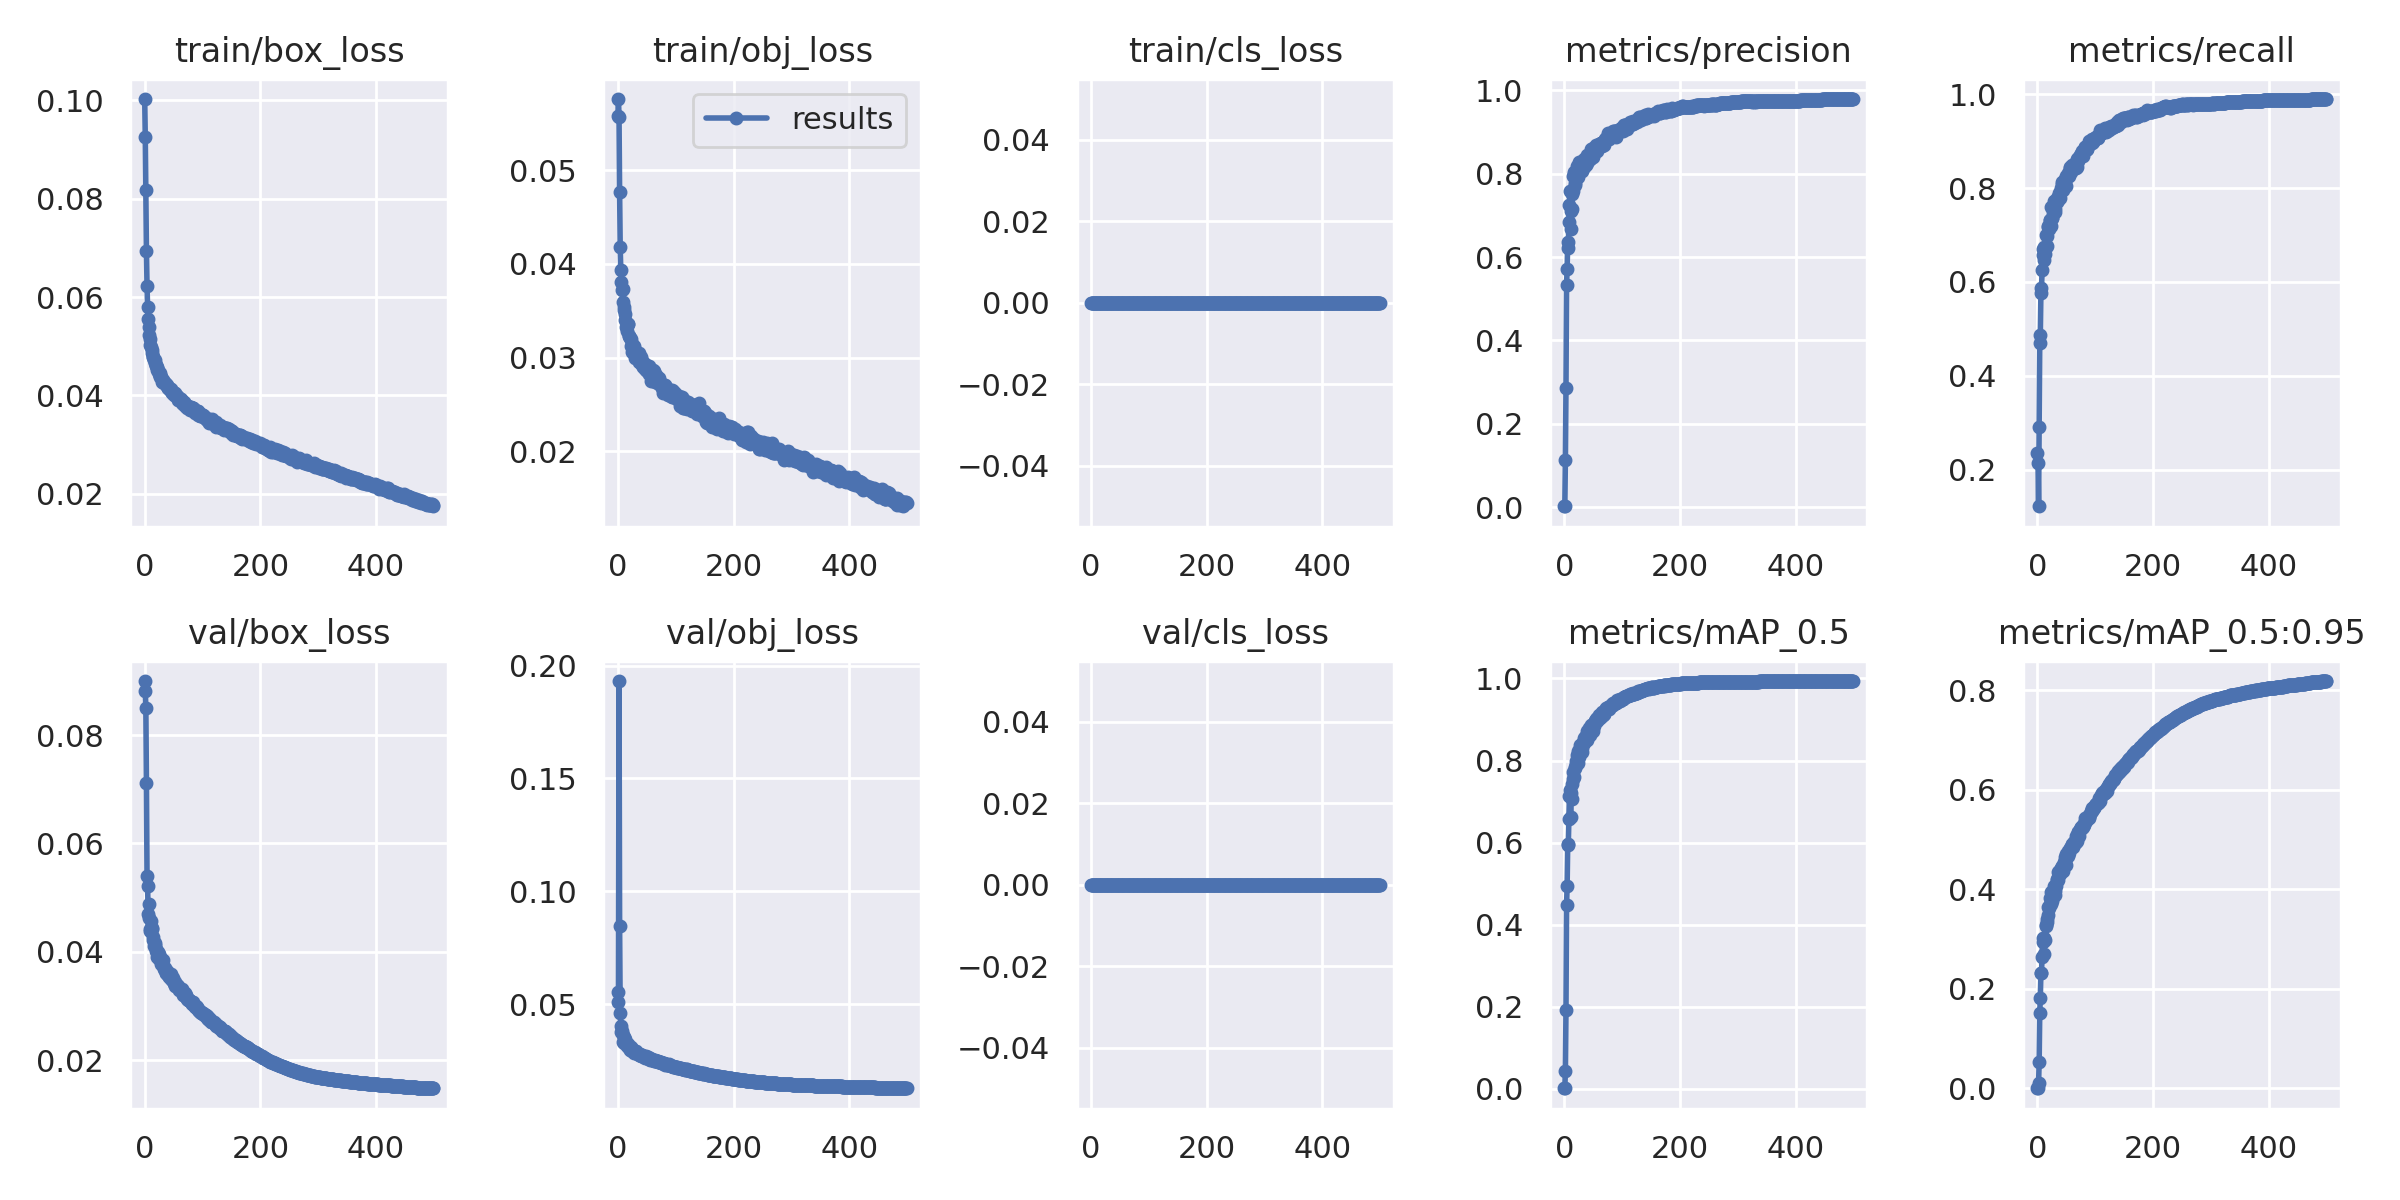

In [ ]:
Image(filename='/content/drive/MyDrive/framework/yolov5/runs/train/xxx_result4/results.png', width=800)

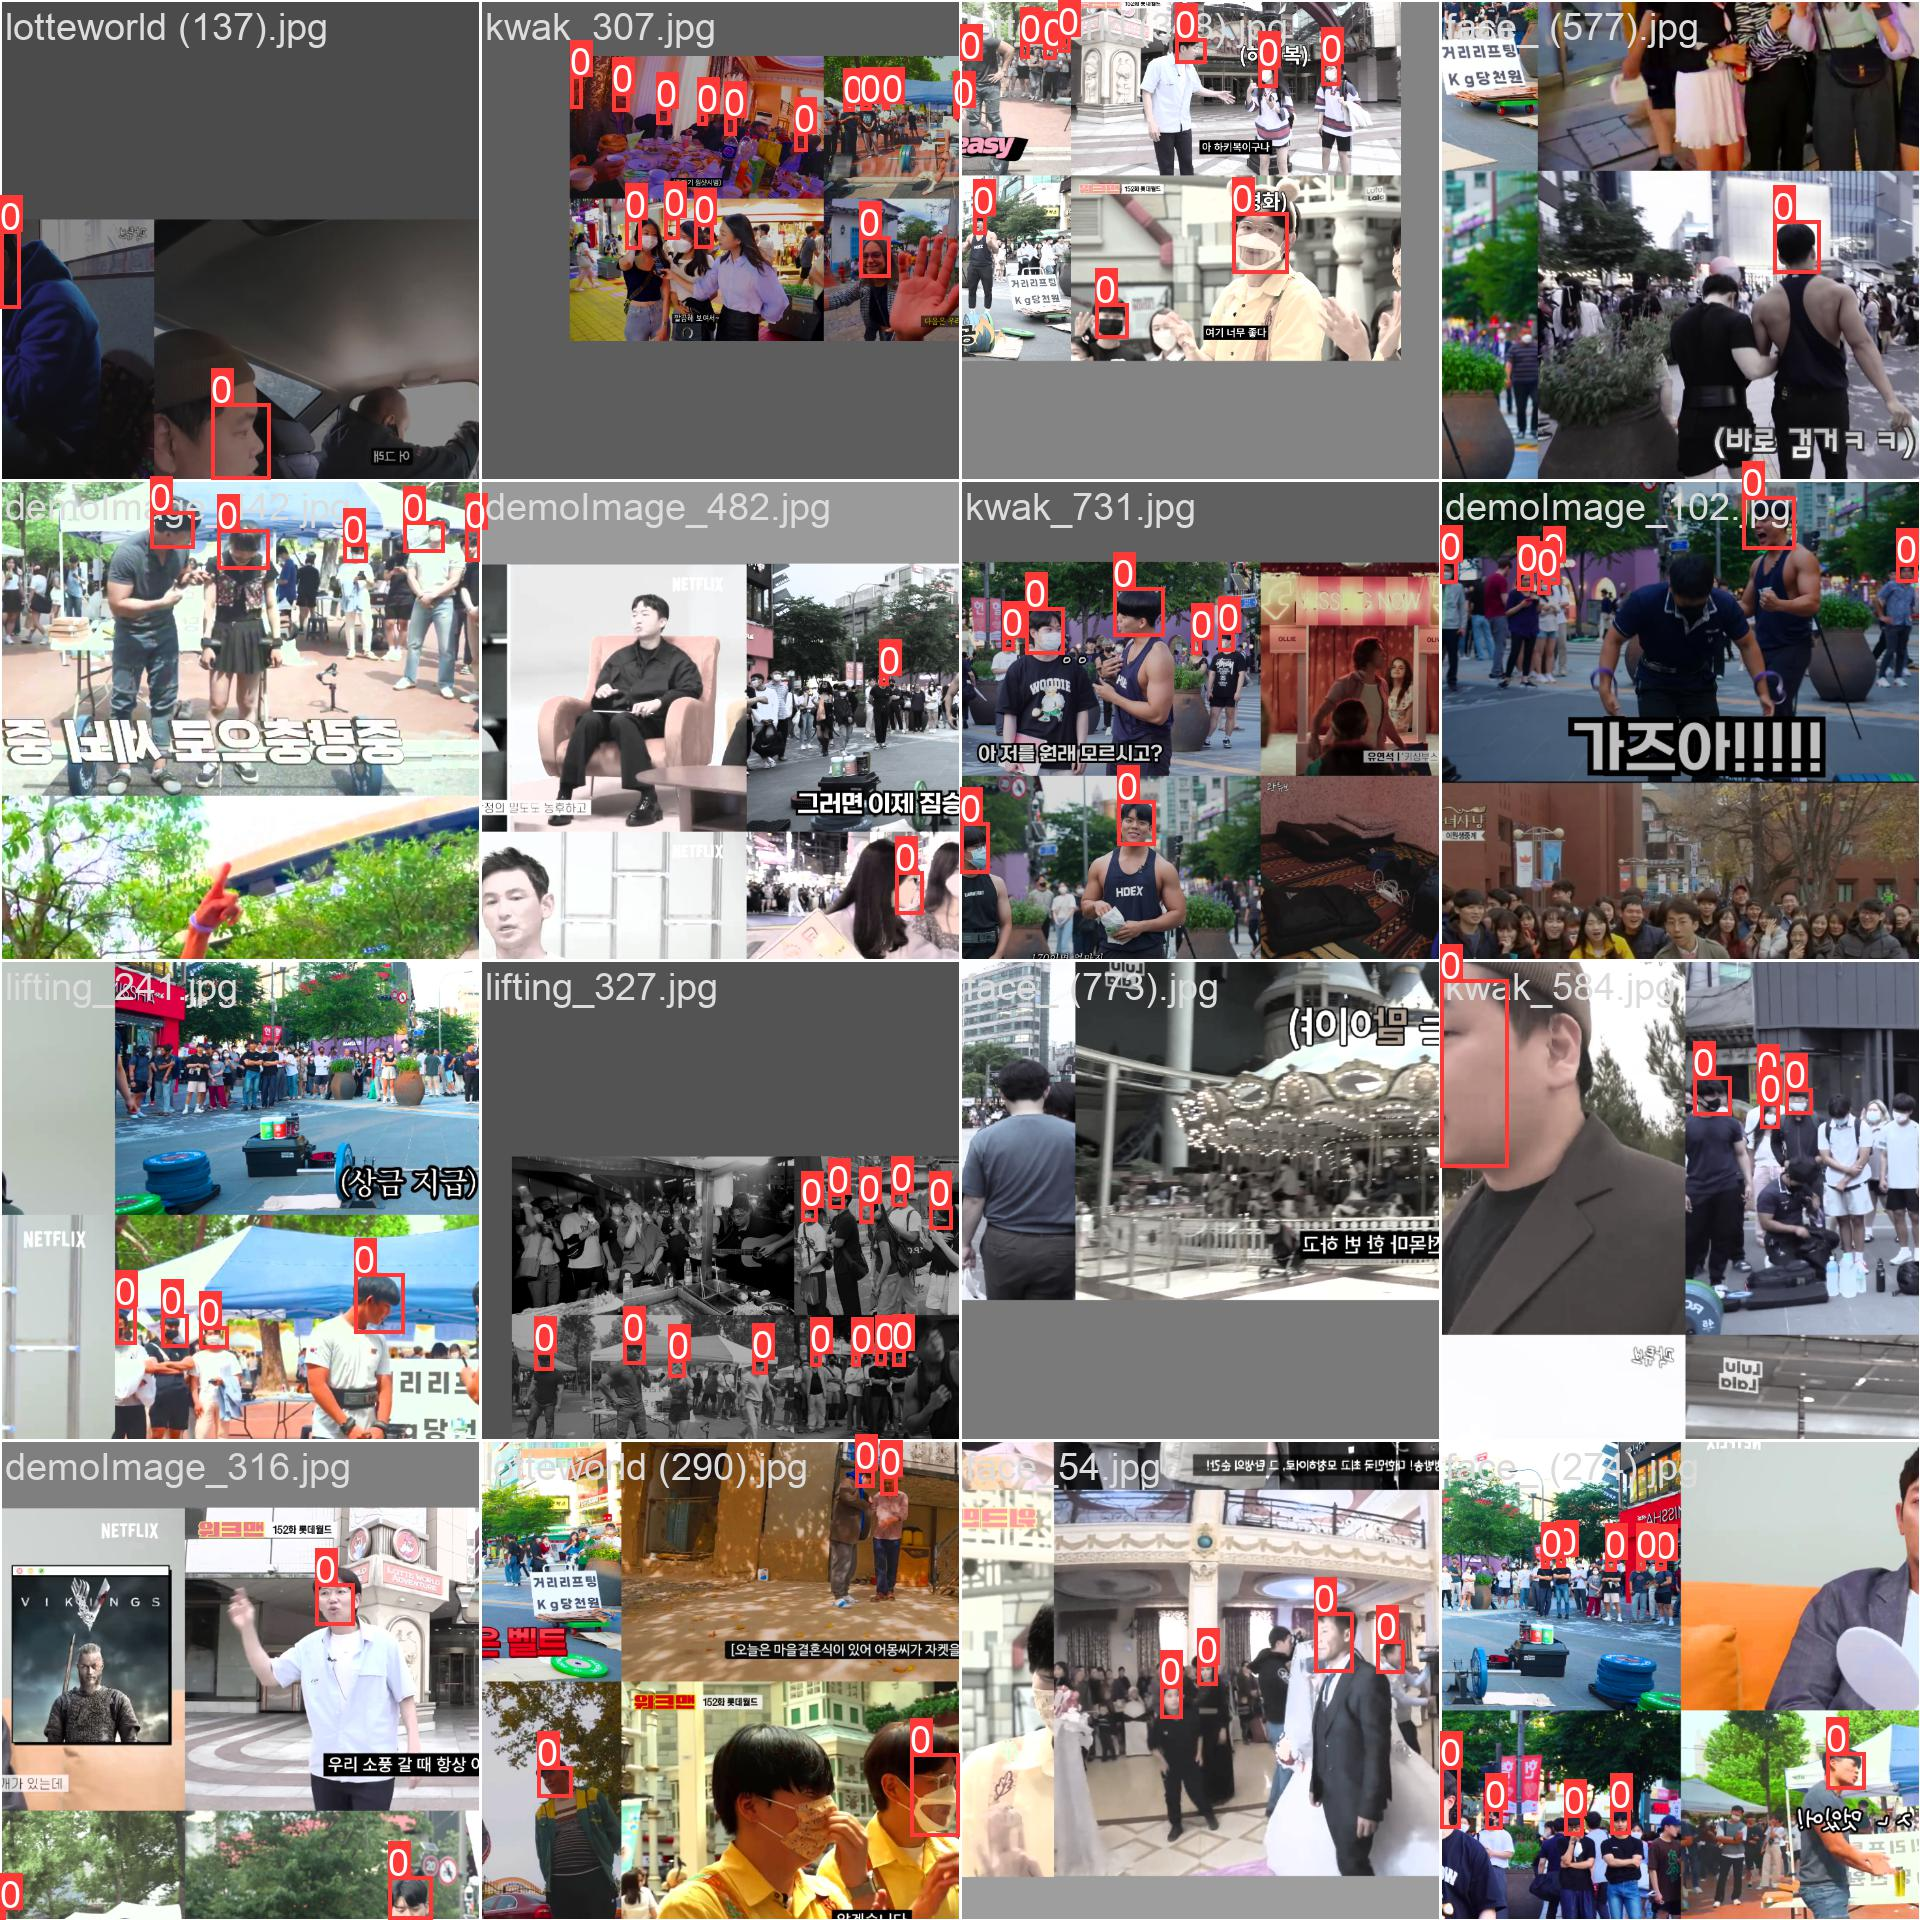

In [ ]:
# 디텍팅 확인
Image(filename='/content/drive/MyDrive/framework/yolov5/runs/train/xxx_result4/train_batch0.jpg', width=800)

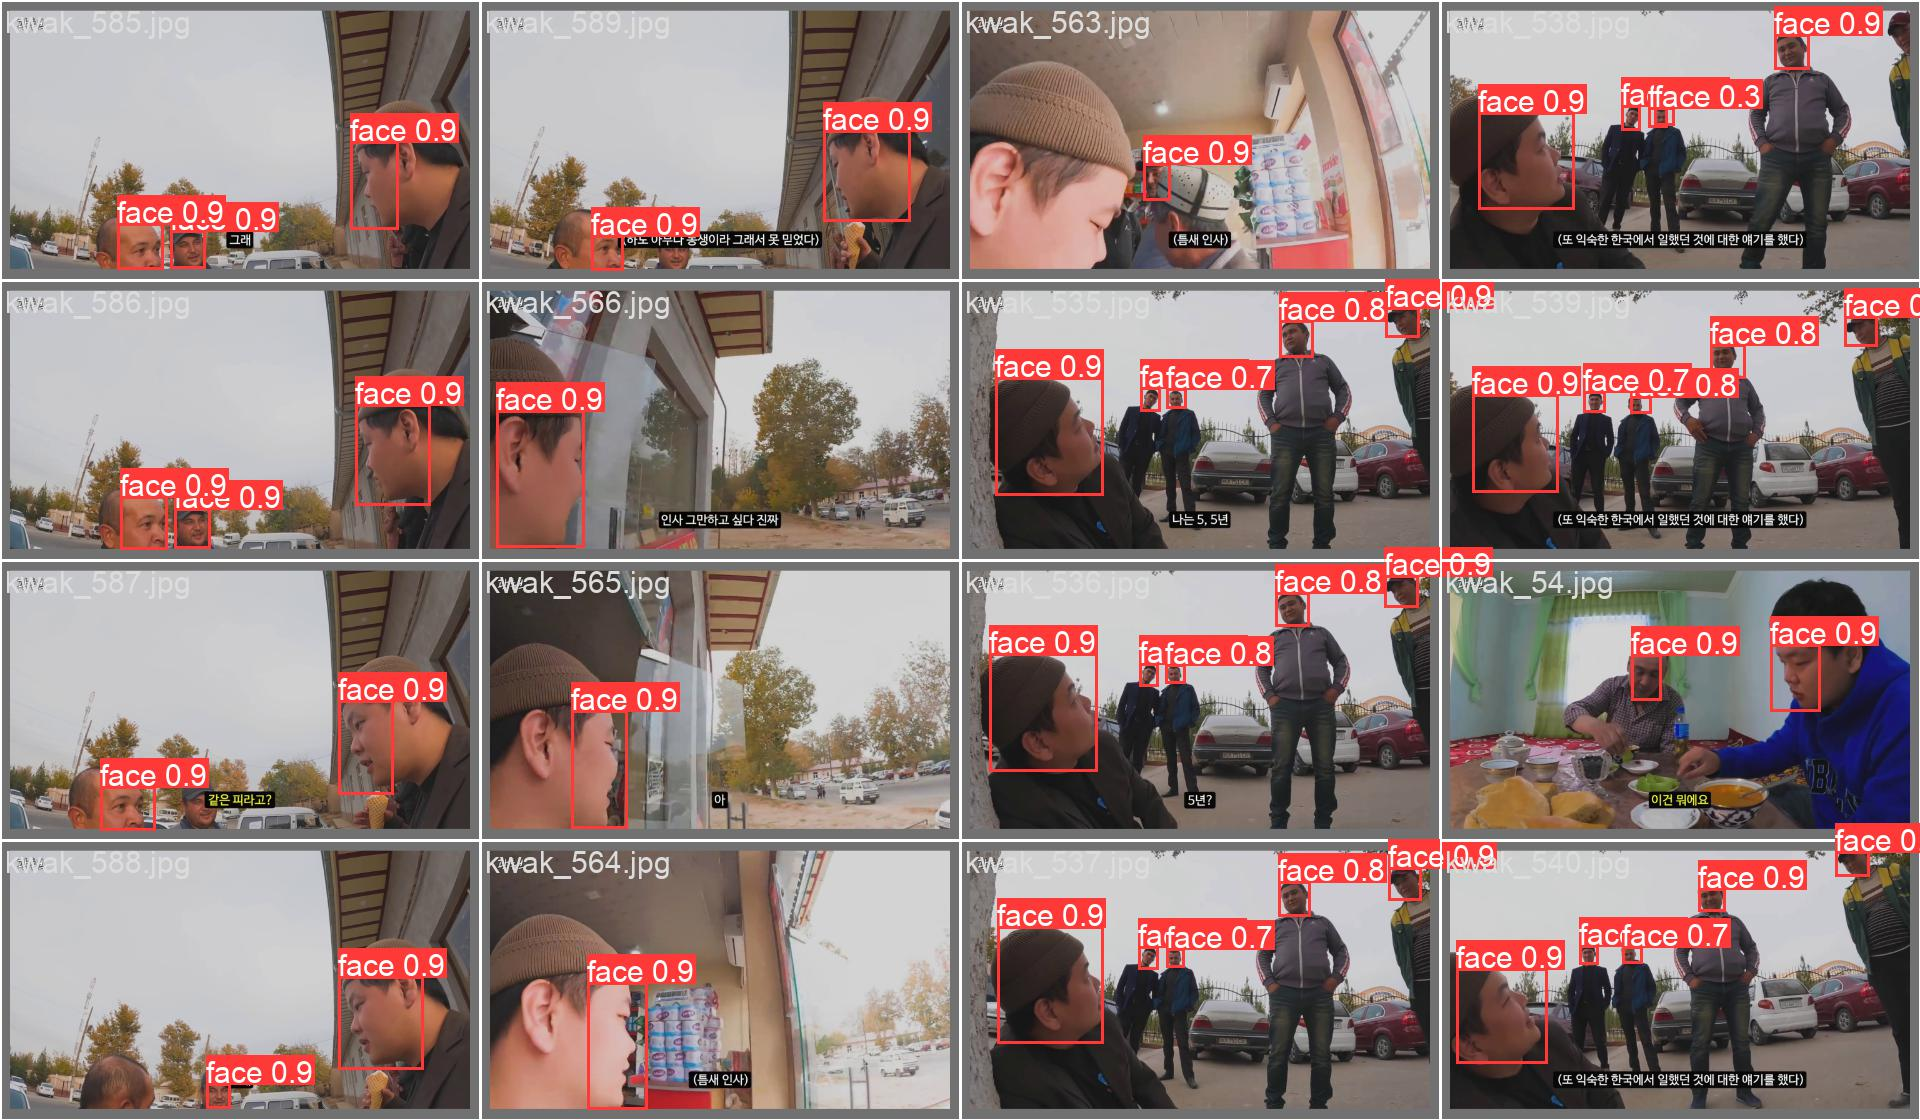

In [ ]:
# 라벨값 확인
Image(filename='/content/drive/MyDrive/framework/yolov5/runs/train/xxx_result4/val_batch1_pred.jpg', width=800)

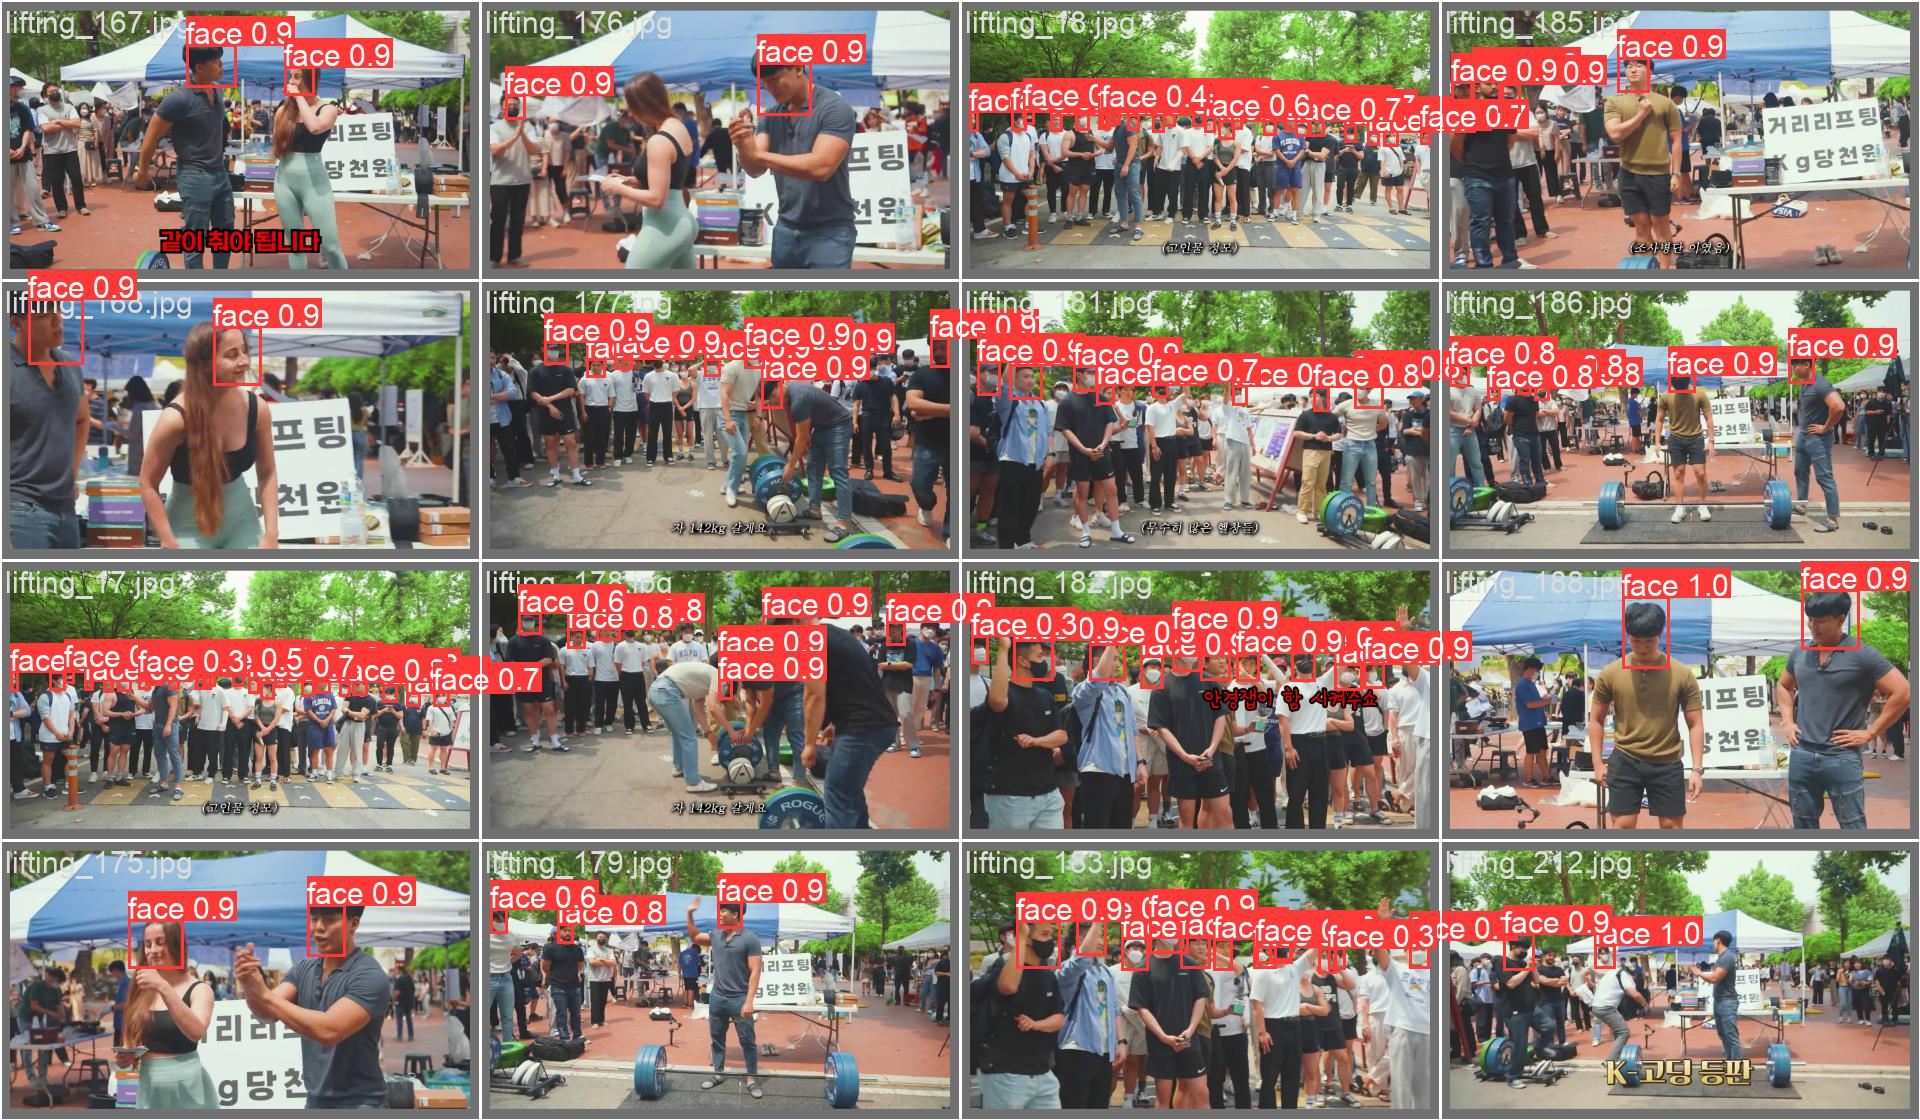

In [ ]:
Image(filename='/content/drive/MyDrive/framework/yolov5/runs/train/xxx_result4/val_batch2_pred.jpg', width=800)

## 테스트

In [ ]:
from google.colab import files
uploaded = files.upload()

In [4]:
import cv2
import os

vidcap=cv2.VideoCapture('/content/drive/MyDrive/framework/xxx/Facenet_Tensorflow/YOLOtest.mp4')

cnt=0
os.mkdir('/content/drive/MyDrive/framework/xxx/Traintest')

while(vidcap.isOpened()):
  ret, image = vidcap.read()
  if ret == False:
    break

  if(int(vidcap.get(1)) % 60 == 0): # 10프레임마다 1장씩 저장
    if cnt % 10 ==0:   
      print('Save img number:' + str(int(cnt)))
      
    cv2.imwrite('/content/drive/MyDrive/framework/xxx/Traintest/test_%d.jpg'%cnt, image)
    cnt+=1

vidcap.release()
#cv2.destroyAllWindows()

Save img number:0
Save img number:10
Save img number:20
Save img number:30
Save img number:40
Save img number:50
Save img number:60
Save img number:70
Save img number:80
Save img number:90
Save img number:100
Save img number:110
Save img number:120


KeyboardInterrupt: ignored

In [5]:
!ls /content/drive/MyDrive/framework/yolov5/runs/train/xxx_result4/weights/

best.pt  last.pt


In [9]:
!pwd
%cd /content/drive/MyDrive/framework/yolov5

/content/drive/.shortcut-targets-by-id/1_cts6OqJRy7uzehTSw7NkFVKIcT3T0er/framework
/content/drive/.shortcut-targets-by-id/1_cts6OqJRy7uzehTSw7NkFVKIcT3T0er/framework/yolov5


In [10]:
# 가중치 파일 경로 지정
!python detect.py --source /content/drive/MyDrive/framework/xxx/Traintest --weights /content/drive/MyDrive/framework/yolov5/runs/train/xxx_result4/weights/best.pt

detect: weights=['/content/drive/MyDrive/framework/yolov5/runs/train/xxx_result4/weights/best.pt'], source=/content/drive/MyDrive/framework/xxx/Traintest, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v6.2-157-g30fa9b6 Python-3.7.14 torch-1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
custom_YOLOv5s summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
image 1/129 /content/drive/.shortcut-targets-by-id/1_cts6OqJRy7uzehTSw7NkFVKIcT3T0er/framework/xxx/Traintest/test_0.jpg: 384x640 (no detections), 12.3ms
image 2/129 /content/drive/.shortcut-targets-by-id/1_cts6OqJRy7uzehTSw7NkFVKIcT3T0er/framework/xxx/Traintest/

In [11]:
!python detect.py --source /content/drive/MyDrive/framework/xxx/Facenet_Tensorflow/YOLOtest.mp4 --weights /content/drive/MyDrive/framework/yolov5/runs/train/xxx_result4/weights/best.pt

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
video 1/1 (19259/24256) /content/drive/.shortcut-targets-by-id/1_cts6OqJRy7uzehTSw7NkFVKIcT3T0er/framework/xxx/Facenet_Tensorflow/YOLOtest.mp4: 384x640 2 faces, 8.9ms
video 1/1 (19260/24256) /content/drive/.shortcut-targets-by-id/1_cts6OqJRy7uzehTSw7NkFVKIcT3T0er/framework/xxx/Facenet_Tensorflow/YOLOtest.mp4: 384x640 2 faces, 8.7ms
video 1/1 (19261/24256) /content/drive/.shortcut-targets-by-id/1_cts6OqJRy7uzehTSw7NkFVKIcT3T0er/framework/xxx/Facenet_Tensorflow/YOLOtest.mp4: 384x640 3 faces, 8.7ms
video 1/1 (19262/24256) /content/drive/.shortcut-targets-by-id/1_cts6OqJRy7uzehTSw7NkFVKIcT3T0er/framework/xxx/Facenet_Tensorflow/YOLOtest.mp4: 384x640 3 faces, 12.8ms
video 1/1 (19263/24256) /content/drive/.shortcut-targets-by-id/1_cts6OqJRy7uzehTSw7NkFVKIcT3T0er/framework/xxx/Facenet_Tensorflow/YOLOtest.mp4: 384x640 4 faces, 8.8ms
video 1/1 (19264/24256) /content/drive/.shortcut-targets-by-id/1_cts6OqJRy7uzehTSw7NkFVKIcT3T0er/framework/xxx/Facenet_Tensorflo

In [ ]:
!python val.py --weights /content/drive/MyDrive/trash/yolov5/runs/train/ocean_results10/weights/best.pt --data /content/drive/MyDrive/trash/data.yaml --img 640 --iou 0.65 --half

In [ ]:
!python val.py --weights /content/drive/MyDrive/trash/yolov5/runs/train/ocean_results10/weights/best.pt --data /content/drive/MyDrive/trash/data.yaml --img 640 --task test

In [ ]:
# 가중치 파일 경로 지정
!python detect.py --weights /content/drive/MyDrive/trash/yolov5/runs/train/ocean_results10/weights/best.pt --img 640 --conf 0.4 --source /content/drive/MyDrive/trash/data_source/test_500/test_500

In [ ]:
import random
from glob import glob

image_name = random.choice(glob('/content/drive/MyDrive/trash/yolov5/runs/detect/exp5/*jpg'))
Image(filename=image_name,width=800)

In [ ]:
shutil.copy('/content/drive/MyDrive/trash/yolov5/runs/detect/exp3/test.mp4', 
            '/content/drive/MyDrive/trash')

'/content/drive/MyDrive/trash/test.mp4'

In [ ]:
!pwd
%cd /content/drive/MyDrive/framework/xxx

/content/drive/.shortcut-targets-by-id/1_cts6OqJRy7uzehTSw7NkFVKIcT3T0er/framework/yolov5
/content/drive/.shortcut-targets-by-id/1_cts6OqJRy7uzehTSw7NkFVKIcT3T0er/framework/xxx


In [ ]:
#!git clone https://github.com/glennford49/Facenet_Tensorflow.git

Cloning into 'Facenet_Tensorflow'...
remote: Enumerating objects: 21, done.
remote: Counting objects: 100% (21/21), done.
remote: Compressing objects: 100% (19/19), done.
remote: Total 21 (delta 2), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (21/21), done.


In [ ]:
!pip install opencv-contrib-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install imageio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
%cd /content/drive/MyDrive/framework/xxx/Facenet_Tensorflow/

/content/drive/.shortcut-targets-by-id/1_cts6OqJRy7uzehTSw7NkFVKIcT3T0er/framework/xxx/Facenet_Tensorflow


In [ ]:
#!python /content/drive/MyDrive/framework/xxx/Facenet_Tensorflow/data_preprocess.py

2022-09-23 08:26:20.458890: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:39] Overriding allow_growth setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
Deprecated in favor of operator or tf.math.divide.
Instructions for updating:
Deprecated in favor of operator or tf.math.divide.
Image: ./train_img/Hwang/jung (113).jpg
Image: ./train_img/Hwang/jung (112).jpg
Image: ./train_img/Hwang/jung (111).jpg
Image: ./train_img/Hwang/jung (109).jpg
Image: ./train_img/Hwang/jung (11).jpg
Image: ./train_img/Hwang/jung (110).jpg
Image: ./train_img/Hwang/jung (108).jpg
Image: ./train_img/Hwang/jung (106).jpg
Image: ./train_

In [ ]:
!python /content/drive/MyDrive/framework/xxx/Facenet_Tensorflow/train_main.py

Training Start
2022-09-23 08:33:26.956554: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:39] Overriding allow_growth setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
Classes: 4
Images: 159
Model filename: ./model/20180402-114759.pb
Instructions for updating:
Use tf.gfile.GFile.
Instructions for updating:
Use tf.gfile.GFile.
Extracting features of images for model
Training Started
Saved classifier model to file "./class/classifier.pkl"
All Done


In [ ]:
!apt-get install -y xvfb # Install X Virtual Frame Buffer
import os
os.system('Xvfb :1 -screen 0 1600x1200x16  &')    # create virtual display with size 1600x1200 and 16 bit color. Color can be changed to 24 or 8
os.environ['DISPLAY']=':1.0'    # tell X clients to use our virtual DISPLAY :1.0

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following NEW packages will be installed:
  xvfb
0 upgraded, 1 newly installed, 0 to remove and 20 not upgraded.
Need to get 785 kB of archives.
After this operation, 2,271 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic-updates/universe amd64 xvfb amd64 2:1.19.6-1ubuntu4.11 [785 kB]
Fetched 785 kB in 1s (668 kB/s)
Selecting previously unselected package xvfb.
(Reading database ... 155569 files and directories currently installed.)
Preparing to unpack .../xvfb_2%3a1.19.6-1ubuntu4.11_amd64.deb ...
Unpacking xvfb (2:1.19.6-1ubuntu4.11) ...
Setting up xvfb (2:1.19.6-1ubuntu4.11) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...


In [ ]:
!python /content/drive/MyDrive/framework/xxx/Facenet_Tensorflow/face_recognition.py

2022-09-23 08:43:59.251892: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:39] Overriding allow_growth setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
Deprecated in favor of operator or tf.math.divide.
Instructions for updating:
Deprecated in favor of operator or tf.math.divide.
Loading Model
Model filename: ./model/20180402-114759.pb
Instructions for updating:
Use tf.gfile.GFile.
Instructions for updating:
Use tf.gfile.GFile.
< cv2.VideoCapture 0x7fbfd6c2d150>
Start Recognition
Predictions : [ name: Hwang , accuracy: 0.976 ]
Predictions : [ name: Hwang , accuracy: 0.939 ]
Predictions : [ name: Hwang , accu

In [ ]:
!python /content/drive/MyDrive/framework/xxx/Facenet_Tensorflow/face_recognition.py print(out)

/bin/bash: -c: line 0: syntax error near unexpected token `('
/bin/bash: -c: line 0: `python /content/drive/MyDrive/framework/xxx/Facenet_Tensorflow/face_recognition.py print(out)'
